# ICA 獨立成份分析
## 目錄
---
1. Introduction
2. 獨立成份分析(ICA)
3. ICA - 訊號處理
4. FastICA-Algorithm
5. 選擇多少個來源訊號的數量？
6. 總結
7. 參考資源
---

## 1. Introduction
在談論有關於降維(Dimension Reduction)的方法時，獨立成份分析(Independent Component Analysis, ICA)跟主成份分析(Principal Component Analysis)常常會一起被討論。

先回想一下，所謂的主成份分析(PCA)，就是將手中的原始資料，從高維空間投影到低維空間，期望此投影資料在低維空間中具有最大的變異(Variance)。做法上，會利用特徵值跟特徵向量，將原始變數(original variables)做線性組合(linear combination)，所產生的components便能最大化解釋原始資料的變異量。

而獨立成份分析(ICA)，會先假設手中的資料其實有經過混合(例如，多個彼此獨立的分配，混合成手中的資料)，因此期望能夠從手中的資料，回推出是哪些獨立的分配。

若以食物來比喻，就是你現在正在品嘗一道菜，並試圖辨識出裡面使用了哪些調味料跟哪些食材。

兩種都是屬於降維的方法，但概念上截然不同。若以食物比喻兩者概念的話：

- 主成份分析(PCA)：「你現在手中有各種調味料跟食材，那要如何搭配比例，才能做出最美味的一道菜」；
- 獨立成份分析(ICA)：「你現在正在品嘗一道菜，並試圖辨識出裡面使用了哪些調味料跟哪些食材。」

當然，降維的方法還有很多：SVD，LLE，LDA，QDA，Laplacian Eigenmaps，t-SNE…等等，日後有機會再討論。

## 2. 獨立成份分析（ICA）
當你開始研究ICA時，一定會知道的案例就是「雞尾酒會問題(Cocktail-Party Problem)」。

這個問題本來是源自於心理學，他們稱作「雞尾酒會效應」，研究的是人類為何能在一片吵雜的雞尾酒會中，依然能專注於自己想聽的那個談話，或是某些特殊聲音(例如，遠方忽然有人用自己的母語在交談)。這個問題從心理學、聽覺、以及腦科學的角度，解釋人類的「聽力選擇能力」。

來到電腦科學的時代時，人類就開始好奇，有沒有辦法也讓電腦獲得這種辨識能力？基於此動機，並搭配統計學的理論，所發展出來的模型就是獨立成份分析(ICA)，其概念基本上可以用下圖來解釋：

![雞尾酒問題](./ICA_1.png)

在做資料分析時，手上的資料x基本上都是「蒐集而來的」，也就是對應圖中的「麥克風」。

「麥克風」所蒐集到的資料，可以視為從多個來源(Soucre, s)而來，並且經過某些疊加/組合的過程(A)，最後成為最後手中的資料(x)，所以可以寫成以下公式：$x = As$。

ICA的做法，就是試圖「從 x 回推到 s」。

## 3. ICA-訊號處理
首先，我們來示範一個雞尾酒簡化版問題，我們將麥克風以及音源都設置為兩種

因此，一開始我們可以先製造出兩種不同的訊號

In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False  

1. 先做出一個 sin 波以及 方波（square signal)
2. 加入一些噪音
3. 兩個訊號波混合成一個訊號波 Ｘ

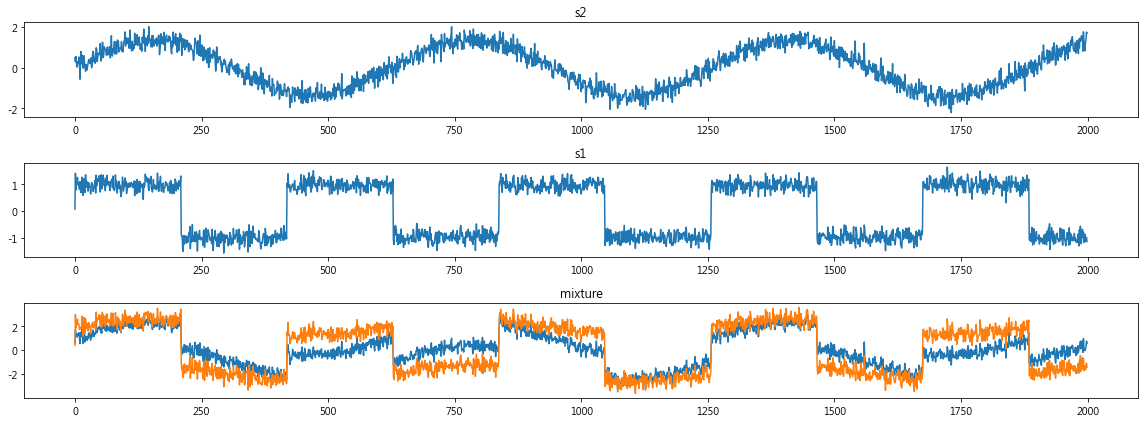

In [47]:
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 10, n_samples)
s1 = np.sin(2 * time)  
s2 = np.sign(np.sin(3 * time)) 

S = np.c_[s1, s2]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1], [0.5, 2]])  # Mixing matrix
mixture = np.dot(S, A.T)  # Generate observations

plt.figure(figsize=(16,6))
pl.subplot(3, 1, 1)
plt.plot(np.hsplit(S,[1])[0])
plt.title("s2")

plt.subplot(3, 1, 2)
plt.plot(np.hsplit(S,[1])[1])
plt.title("s1")

plt.subplot(3, 1, 3)
plt.plot(X)
plt.title("mixture")

plt.tight_layout()
plt.show()

## 4. FastICA-Algorithm
FastICA 是由 Aapo Hyvärinen 所提出， 如今最廣泛、也最有效率的獨立成份分析演算法。

在使用時，提到有兩個強假設要遵守(詳情請參閱上面之資源)：

1. 來源訊號/資料間彼此之間獨立

2. 來源訊號/資料不可以為常態分布

由於 FastICA 在運算時，會使用最大化的kurtosis(峰度)來判斷來源訊號/資料，因此常態分布的資料 kurtosis 為 0 ，在運算上就會被自動排除。至於獨立的部份，想必不用多說。

sklearn 中已經有現有的 FastICA 可以進行使用，以下我們將使用該套件進行示範

In [48]:
from sklearn.decomposition import FastICA

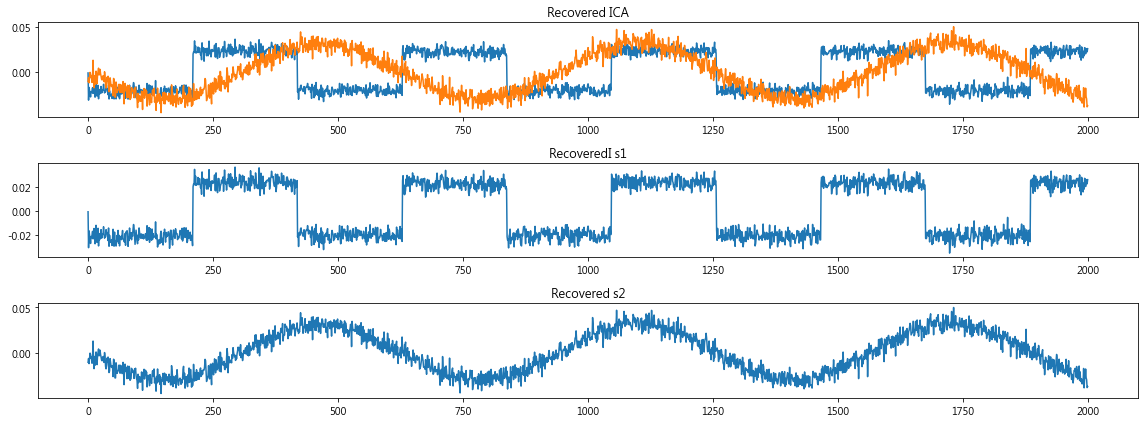

In [66]:
# Compute ICA
ica = transformer = FastICA(n_components=2, random_state=0)
S_ = ica.fit(X).fit_transform(X)  # Get the estimated sources

plt.figure(figsize=(16,6))
pl.subplot(3, 1, 1)
plt.plot(S_)
plt.title("Recovered ICA")

pl.subplot(3, 1, 2)
plt.plot(np.hsplit(S_,[1])[0])
plt.title("RecoveredI s1")

pl.subplot(3, 1, 3)
plt.plot(np.hsplit(S_,[1])[1])
plt.title("Recovered s2")

plt.tight_layout()
plt.show()

可以發現我們利用 ICA 將原本的訊號給還原出來了～

## 5. 選擇多少個來源訊號的數量？

跟主成份分析(PCA)需要決定選多少個主成份(利用「解釋變異」)的概念一樣，一般在使用 ICA 時，也必須知道原始訊號的數量，也就是上面程式的n.comp參數。

在實務應用中，一般可以仰賴領域(先驗)知識來決定。例如，你可以確定原始訊號的個數，跟混合訊號一樣。

但如果沒有相關經驗或知識的話，就很難判斷 ICA 中的來源訊號要選幾個。這時候，就得依照某些方法選擇component的數量。

其中，基於information-theoretic criteria (ITC)的資訊理論，是一個不錯且實用的方法：Estimating the number of independent components for functional magnetic resonance imaging data


## 6. 總結

由於 ICA 可以從混合訊號中分離出原始訊號，因此常被用於醫學跟通訊領域的研究中，從蒐集到的電子訊號中找出來源或起因。

此外 ICA 跟 PCA 一樣，都是常用來降維的手法。若由特徵的角度來看，兩者也都是特徵萃取(feature extraction)的演算法，但思維卻不一樣：

**「ICA 是從資料中分離出特徵，PCA 則是從資料中結合出特徵」**

但因為原始訊號(component)的數量難以定論，以及原始訊號得為非高斯(常態)分配的假設，因此相較於 PCA ，ICA 在某些運用上被認為不太實用，往往會面臨到一些困境(當然，還是得根據運用的領域跟目的而定)。

因此，使用前要好好先理解兩者的概念，理解優與劣，再根據問題及目標來應用。

## 7. 參考資源
- R筆記 – (17)獨立成份分析(ICA) <br>
https://rpubs.com/skydome20/R-Note17-ICA
- sklearn fastICA <br>
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html